<a href="https://colab.research.google.com/github/jessykappm/Machine-Learning/blob/main/KNN_Naive_Bayes_Decision_Tree_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aprendizado Supervisionado - Classificação**

https://scikit-learn.org/

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download Conjunto de Dados [Íris](https://drive.google.com/file/d/1zU372zcHbv3ezRIUYONAkZBz5tsgCnM8/view?usp=sharing)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv' ) #conjunto de dados Íris em csv

In [ ]:
print(df.head()) #visualizar as primeiras linhas do conjunto de dados 

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [ ]:
df.variety.unique() #identificando as classes

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
print(df.variety.value_counts()) #número de amostras por classe

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X = df.drop('variety', axis=1) #remove a variety (target)
y = df.variety   #define variety (classes) como target

In [ ]:
# divisão do conjunto de dados em Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



---



💡 Experimentos: Verifique se melhora a performance do seu modelo ao transformar os dados usando: StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(X)  

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 




---



### Algoritmo KNN 

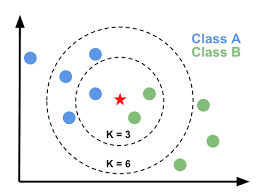

KNN (K-Nearest Neighbors) passo-a-passo:

1.   Calcula a distância entre o exemplo desconhecido e todos os exemplos do conjunto de treinamento;

2.   Identificar os K vizinhos mais próximos;

3.   Definir a classe do novo objeto de acordo com a classe do maior número de vizinhos próximos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2) #número de vizinhos e p = 2 distância euclideana

In [ ]:
knn.fit(X_train,y_train) #método fit, treinando o modelo com dados de treinamento

KNeighborsClassifier()

In [ ]:
knn.score(X_test,y_test) #Verificando Score

0.9333333333333333

In [ ]:
y_pred = knn.predict(X_test) #testando o modelo

print('Classificador:', y_pred[1])
print('Valor Real:', y_test.iloc[1])

Classificador: Setosa
Valor Real: Setosa




---



###Algoritmo Naive Bayes 

O teorema de Bayes descreve a probabilidade de ocorrência de um evento, com base no conhecimento prévio das condições que podem estar relacionadas ao evento.

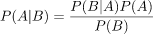

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv' ) #conjunto de dados Íris
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
print(df['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']


In [ ]:
from sklearn.preprocessing import LabelEncoder

target_num = LabelEncoder()
target_num.fit(df['variety'])
df['variety'] = target_num.fit_transform(df['variety']) #transforma Variety em valor numérico

print(df['variety'].unique())

[0 1 2]


In [ ]:
X = df.iloc[:,1:3] #features treinamento
y = df.variety   #define variety como target (classe) 



---



💡 Experimento: Teste a redução de dimensionalidade com PCA com 2 componentes

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 
X = pca.fit_transform(df.iloc[:,0:4])


In [ ]:
y = df.variety



---



In [ ]:
# divisão do conjunto de dados em Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
gnb = GaussianNB() #Modelo Naive Bayes

gnb.fit(X_train, y_train)  #método fit, treinando o modelo com dados de treinamento

GaussianNB()

In [ ]:
gnb.score(X_test,y_test) #score do modelo no conjunto de dados de teste. Validação

0.8333333333333334

In [ ]:
y_pred = gnb.predict(X_test) #testando uma única amostra de testes

print('Classificador:', y_pred[1])
print('Valor Real:', y_test.iloc[1])

Classificador: 2
Valor Real: 2


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Limite de decisão - Naive Bayes')

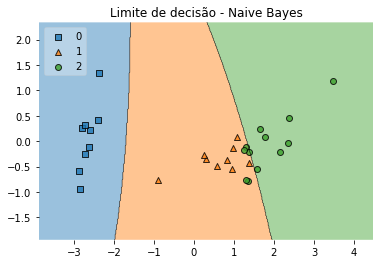

In [ ]:
# Plotando Decision Boundary (Limite de decisão)
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(np.asarray(X_test), np.asarray(y_test), clf = gnb,legend=2)
plt.title("Limite de decisão - Naive Bayes")




---



### Algoritmo Decision Tree 

Árvore de decisão - Cada nó de decisão
contém um teste para algum atributo, cada ramo descendente corresponde a um
possível valor deste atributo, o conjunto de ramos são distintos, cada folha está
associada a uma classe e, cada percurso da árvore, da raiz à folha corresponde
uma regra de classificação. (Gama, 2004)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv' ) #conjunto de dados Íris

In [ ]:
X = df.drop('variety', axis=1) #remove a variety (target)
y = df.variety   #define variety (classe) como target

In [ ]:
# divisão do conjunto de dados em Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier() #max_depth=3
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtree.score(X_test, y_test) #score do modelo

0.9333333333333333

In [ ]:
y_pred = dtree.predict(X_test) #testando o modelo

print('Classificador:', y_pred[1])
print('Valor Real:', y_test.iloc[1])

Classificador: Versicolor
Valor Real: Versicolor


In [ ]:
arvore_visual = tree.export_text(dtree) #Conceito de White Box
print(arvore_visual)

|--- feature_3 <= 0.80
|   |--- class: Setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: Versicolor
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: Virginica
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: Versicolor
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: Virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Virginica



O critério utilizado para realizar as partições é o da utilidade do atributo
para a classificação. Aplica-se, por este critério, um determinado ganho de
informação a cada atributo. O atributo escolhido como atributo teste para o
corrente nó é aquele que possui o maior ganho de informação. A partir desta
aplicação, inicia-se um novo processo de partição. (M. Onoda - 2001)

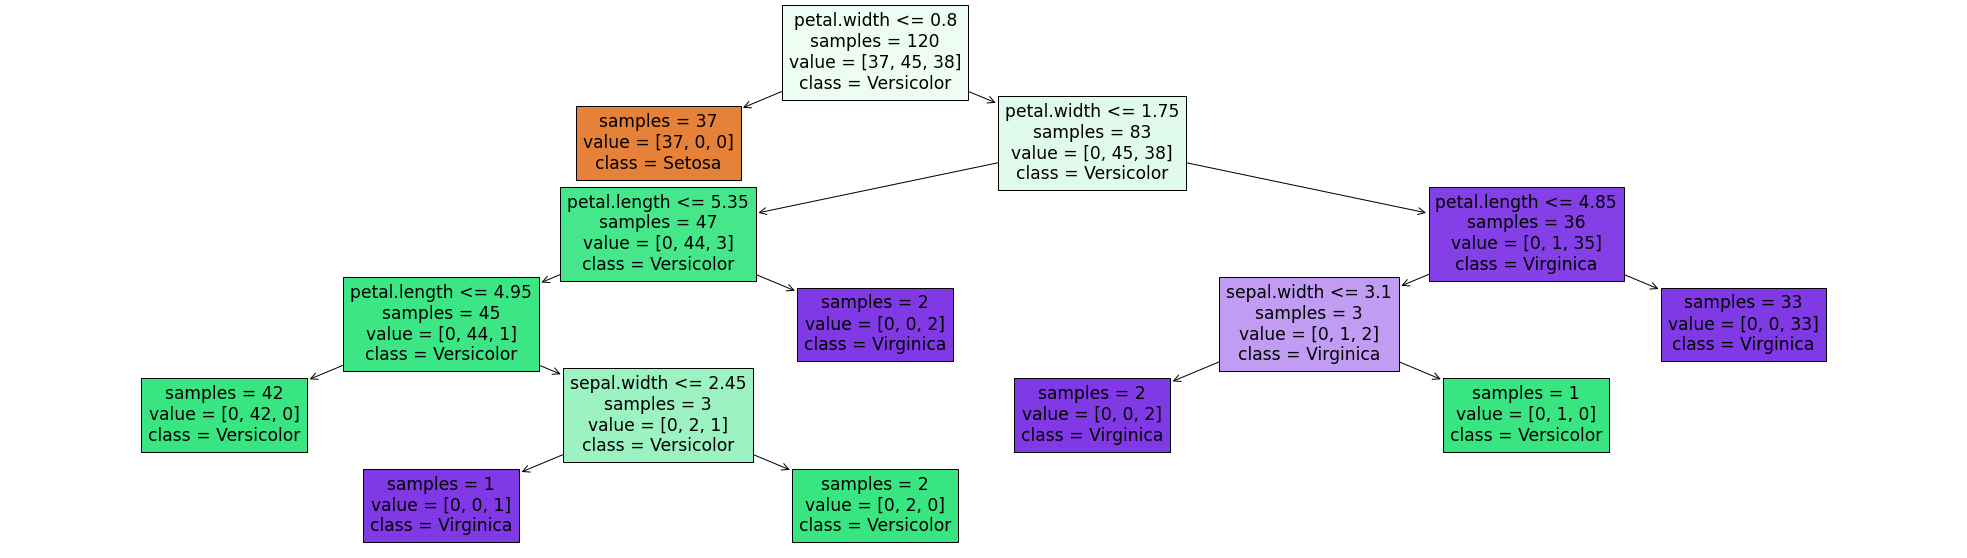

In [ ]:
#Visualização árvore - Conceito whitebox, consigo entender e explicar as regras

fig = plt.figure(figsize = (35,10))
visualdtree = tree.plot_tree(dtree, feature_names = df.columns,  
                             class_names= df.variety.unique(),
                             filled = True, impurity = False)

In [ ]:
print('Níveis ou profundidade', dtree.get_depth())

Níveis ou profundidade 5


In [ ]:
dtree.feature_importances_

array([0.        , 0.0334658 , 0.06142814, 0.90510606])

###Exercício

Realizar download do conjunto de dados [Mobile Price Classification](https://drive.google.com/file/d/1uCps0JVzGhwuxU6JPLEJmLvlcVNH2ykW/view?usp=sharing)

Importar as bibliotecas necessárias

Realizar a análise exploratória dos dados e aplicar técnicas de pré-processamento se necessárias

Testar os métodos de classificação. 

*Feature (price_range) define a faixa de preço do celular.*


In [ ]:
## Digite seu código aqui
